<a href="https://colab.research.google.com/github/HuseynA28/FaceRecognitionMachineLearning/blob/main/TestingModelPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle
import cv2
import sklearn
from tensorflow.keras.models import load_model


In [13]:
face= cv2.CascadeClassifier("/content/drive/MyDrive/FaceRecognition/OpenCV/model/haarcascade_frontalface_default.xml")
deep_model =load_model('/content/drive/MyDrive/FaceRecognition/OpenCV/data/my_model.h5')
pca_model =pickle.load(open("/content/drive/MyDrive/FaceRecognition/OpenCV/data/pca_dict.pkl",mode ="rb"))


In [30]:
model_pca =pca_model['pca']
model_face_mean =pca_model['mean']

In [32]:
img = cv2.imread("/content/drive/MyDrive/FaceRecognition/OpenCV/data/male_000281.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in faces:
  cut = img[y:y+h,x:x+w]
  cut =cut /255
  if cut.shape[0] >100:
    cut_resize = cv2.resize(cut,(100,100), cv2.INTER_AREA)
  else:
    cut_resize = cv2.resize(cut,(100,100), cv2.INTER_CUBIC)

In [34]:
cut_resize.shape

(100, 100, 3)

# **Create a pipline**

In [130]:
img = cv2.imread("/content/drive/MyDrive/FaceRecognition/OpenCV/data/123.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in faces:
  cut = gray[y:y+h,x:x+w]
  cut =cut /255
  if cut.shape[0] >100:
    cut_resize = cv2.resize(cut,(100,100), cv2.INTER_AREA)
  else:
    cut_resize = cv2.resize(cut,(100,100), cv2.INTER_CUBIC)
  cut_reshape = cut_resize.reshape(1,10000)
  roi_mean = cut_reshape - model_face_mean
  eigen_image = model_pca.transform(roi_mean)
  eig_revers_img = model_pca.inverse_transform(eigen_image)
  prediction = deep_model.predict(eigen_image)

  predicted_class_index = np.argmax(prediction)
  classes = ['Male', 'Female']
  predicted_class = classes[predicted_class_index]

  text = f"{predicted_class} {prediction.max()*100} "

  print(text)

  if predicted_class == "Male":
    color = (255,255,0)
  else:
    color = (255,0,255)
  cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
  cv2.rectangle(img,(x,y-2),(x+w,y),color,-1)
  cv2.putText(img,predicted_class,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,color,2)
  output ={
      "eig_revers_img":eig_revers_img,
      "predicted_class":predicted_class,
      "score":prediction.max()*100,
      "data_roi":cut_resize
  }







1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Female 99.97963309288025 


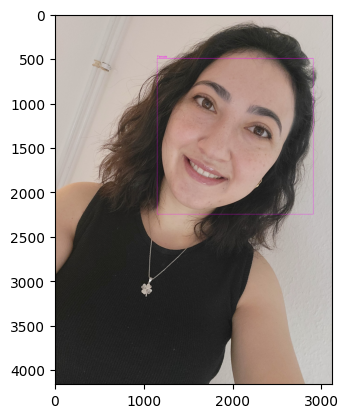

In [131]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)